# **Machine Learning Project**

 WATER QUALITY PREDICTION MODEL

29th April 2025

**Members:**

1. Karim Rahal
2. Sarah Dhainy
**Instrcutor**
1. Dr.Nadine Abbas




# Data Description and Task Overview

## Data Description

This dataset contains measurements of various water quality parameters collected from different water sources over time. Below is a detailed description of each column in the dataset:

1. **Index**: Unique identifier for each data entry.
2. **pH**: The pH level of the water, indicating its acidity or alkalinity.
3. **Iron**: Concentration of iron in the water (in mg/L).
4. **Nitrate**: Concentration of nitrate in the water (in mg/L).
5. **Chloride**: Concentration of chloride in the water (in mg/L).
6. **Lead**: Concentration of lead in the water (in mg/L).
7. **Zinc**: Concentration of zinc in the water (in mg/L).
8. **Color**: The color of the water sample (e.g., Colorless, Faint Yellow).
9. **Turbidity**: The cloudiness or haziness of the water, measured in Nephelometric Turbidity Units (NTU).
10. **Fluoride**: Concentration of fluoride in the water (in mg/L).
11. **Copper**: Concentration of copper in the water (in mg/L).
12. **Odor**: Descriptive term for the odor of the water (e.g., odorless, faint odor).
13. **Sulfate**: Concentration of sulfate in the water (in mg/L).
14. **Conductivity**: The ability of the water to conduct electricity, measured in microsiemens per centimeter (µS/cm).
15. **Chlorine**: Concentration of chlorine in the water (in mg/L).
16. **Manganese**: Concentration of manganese in the water (in mg/L).
17. **Total Dissolved Solids (TDS)**: Total concentration of dissolved substances in the water (in mg/L).
18. **Source**: Source of the water sample (e.g., Lake, River, Ground).
19. **Water Temperature**: Temperature of the water at the time of measurement (in °C).
20. **Air Temperature**: Temperature of the air at the time of measurement (in °C).
21. **Month**: Month when the sample was taken.
22. **Day**: Day of the month when the sample was taken.
23. **Time of Day**: Time of day when the sample was taken (e.g., 0 for midnight, 12 for noon).
24. **Target**: Binary target variable indicating whether the water quality meets a certain standard (0 for meets standard, 1 for does not meet standard).


# **Data Access**

Download the subset `water_quality_dataset_100k_new.csv` dataset from the google drive

https://drive.google.com/file/d/1NPnyvMMa4EgRMpCWd1LOOVGeOOmtcC6f/view?usp=drive_link


`Original dataset` https://www.kaggle.com/datasets/mitanshuchakrawarty/water-quality-prediction/data?select=dataset.csv

## **Import Neccessary Libraries**

In [ ]:
# ! pip install seaborn

In [ ]:
# ! pip install tqdm

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,  ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm



## **Read Data**
![](image/data_snapshot.png)

In [3]:

data= pd.read_csv('sample_data/water_quality_dataset_100k_new.csv')
data = data.drop(columns= "Index")
df=data.copy()

df.head()

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,7.262136,0.002857,5.965704,245.101184,6.679537e-44,0.702867,Faint Yellow,0.014223,0.583591,0.039819,...,2.835370,8.067879e-03,153.126744,Spring,11.179752,55.340114,August,20.0,17.0,0
1,6.827967,0.000356,8.650092,261.948686,2.751868e-159,0.205934,Colorless,0.339881,2.214786,0.224705,...,3.228036,4.245956e-05,260.391845,Ground,12.573723,80.335206,June,26.0,2.0,1
2,NaN,0.000063,NaN,176.192348,NaN,0.896104,Near Colorless,0.122076,1.566183,0.058934,...,2.863932,1.646600e-03,131.984171,Reservoir,12.702576,81.535521,January,4.0,16.0,0
3,7.782600,0.051721,3.747001,224.053938,1.513023e-136,0.088500,Colorless,0.209460,0.693032,0.393710,...,4.195383,5.283502e-11,447.051626,NaN,13.009862,72.845282,May,13.0,1.0,0
4,7.627800,0.000172,7.988966,89.478315,3.450032e-76,0.402281,Colorless,0.520102,1.130603,0.211742,...,4.004640,9.799640e-03,395.187898,Ground,17.727374,36.844691,December,25.0,18.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   pH                      97979 non-null   float64
 1   Iron                    99328 non-null   float64
 2   Nitrate                 98204 non-null   float64
 3   Chloride                97045 non-null   float64
 4   Lead                    99571 non-null   float64
 5   Zinc                    97439 non-null   float64
 6   Color                   99901 non-null   object 
 7   Turbidity               99167 non-null   float64
 8   Fluoride                96784 non-null   float64
 9   Copper                  96785 non-null   float64
 10  Odor                    97034 non-null   float64
 11  Sulfate                 96723 non-null   float64
 12  Conductivity            97215 non-null   float64
 13  Chlorine                98992 non-null   float64
 14  Manganese            

In [5]:
print("Summary Statistics:")
df.describe()

Summary Statistics:


,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Day,Time of Day,Target
count,97979.000000,9.932800e+04,98204.000000,97045.000000,9.957100e+04,9.743900e+04,9.916700e+04,96784.000000,9.678500e+04,97034.000000,96723.000000,97215.000000,98992.000000,9.817000e+04,99961.000000,97190.000000,99521.000000,98309.000000,98064.000000,100000.000000
mean,7.450048,1.275435e-01,6.154743,184.254852,1.759505e-03,1.553338e+00,5.151431e-01,0.963694,5.157433e-01,1.806235,146.012257,425.602265,3.251744,1.067892e-01,267.386161,19.161161,60.019117,15.723321,11.513461,0.303060
std,0.891517,4.743079e-01,3.236141,68.306315,3.751641e-02,1.546706e+00,9.105212e-01,0.818756,5.914996e-01,1.069706,68.289200,190.475063,0.731622,4.669622e-01,155.972565,11.382027,18.107604,8.800908,6.921008,0.459583
min,2.353677,9.298435e-39,0.587550,29.413497,0.000000e+00,1.270699e-07,3.119116e-13,0.000072,5.313946e-07,0.011100,14.762419,28.615895,1.085141,5.156055e-39,0.013253,1.692632,-19.940412,1.000000,0.000000,0.000000
25%,6.897409,9.697968e-06,3.953114,138.199592,3.575708e-122,4.176054e-01,3.848924e-02,0.377357,1.301375e-01,0.893771,98.082144,286.397011,2.741320,2.405061e-06,132.897849,11.365014,47.840514,8.000000,6.000000,0.000000
50%,7.459988,2.275870e-03,5.593961,175.790181,2.963497e-62,1.082226e+00,2.081580e-01,0.778309,3.481229e-01,1.779163,134.733706,398.014431,3.207097,6.345394e-04,266.045828,16.466972,59.983640,16.000000,12.000000,0.000000
75%,8.018791,5.499786e-02,7.655207,218.162046,4.659272e-27,2.236318e+00,6.226299e-01,1.338076,6.998091e-01,2.658366,181.821092,533.384862,3.703591,1.631163e-02,398.800312,23.921549,72.132507,23.000000,18.000000,1.000000
max,12.392381,1.322768e+01,51.613366,993.933248,4.656781e+00,1.904981e+01,1.733592e+01,12.988166,8.133315e+00,4.141967,1236.343971,1958.124307,10.425895,1.421583e+01,579.793550,165.919987,137.532364,31.000000,23.000000,1.000000


In [6]:
df['Target'].value_counts()

,count
Target,
0,69694
1,30306


# Visualisation

## Pie chart

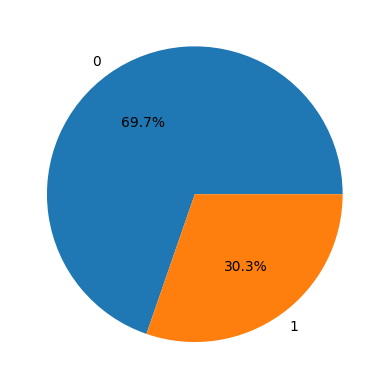

In [7]:
target_count=df['Target'].value_counts()
plt.pie(target_count, labels=target_count.index, autopct='%1.1f%%')
plt.show()

In [8]:
# Separate numerical and categorical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove("Target")
numerical_features


['pH',
 'Iron',
 'Nitrate',
 'Chloride',
 'Lead',
 'Zinc',
 'Turbidity',
 'Fluoride',
 'Copper',
 'Odor',
 'Sulfate',
 'Conductivity',
 'Chlorine',
 'Manganese',
 'Total Dissolved Solids',
 'Water Temperature',
 'Air Temperature',
 'Day',
 'Time of Day']

In [9]:
categorical_features = df.select_dtypes(include=[object]).columns.tolist()

categorical_features

['Color', 'Source', 'Month']

# **Task 1: Data Cleaning and Preprocessing**


## Step 1: Handle Missing or Inconsistent Data

1. **Identify Missing Values:**
   - Detect missing values in the dataset.


In [10]:
df.isna().sum()

,0
pH,2021
Iron,672
Nitrate,1796
Chloride,2955
Lead,429
Zinc,2561
Color,99
Turbidity,833
Fluoride,3216
Copper,3215


In [11]:
df.shape

(100000, 23)

missing value per rows

In [12]:
missing=df.isna().sum(axis=1)/df.shape[1] *100

In [13]:
missing.value_counts()

,count
0.000000,66901
4.347826,27159
8.695652,5264
13.043478,623
17.391304,51
21.739130,2


In [14]:
df.dropna()

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,7.262136,2.857248e-03,5.965704,245.101184,6.679537e-44,0.702867,Faint Yellow,0.014223,0.583591,0.039819,...,2.835370,8.067879e-03,153.126744,Spring,11.179752,55.340114,August,20.0,17.0,0
1,6.827967,3.555528e-04,8.650092,261.948686,2.751868e-159,0.205934,Colorless,0.339881,2.214786,0.224705,...,3.228036,4.245956e-05,260.391845,Ground,12.573723,80.335206,June,26.0,2.0,1
4,7.627800,1.721911e-04,7.988966,89.478315,3.450032e-76,0.402281,Colorless,0.520102,1.130603,0.211742,...,4.004640,9.799640e-03,395.187898,Ground,17.727374,36.844691,December,25.0,18.0,0
5,7.438374,1.023030e-01,6.891186,157.967041,1.198280e-42,0.185183,Yellow,0.000966,1.143355,1.195115,...,4.520820,2.810500e-02,217.500492,Well,6.706531,53.995611,August,20.0,10.0,1
6,7.945263,1.616232e-01,3.082807,191.561335,7.278161e-05,1.808817,Colorless,0.263444,1.765077,0.405573,...,3.615394,6.839616e-11,104.196529,Reservoir,9.201807,33.332203,October,22.0,23.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,6.463093,6.854987e-04,3.980943,301.672995,5.272680e-317,1.355574,Colorless,0.695195,2.287507,0.314559,...,4.140258,3.315744e-04,477.095920,Lake,15.928996,31.335848,August,22.0,3.0,1
99995,6.878051,4.117124e-07,5.322810,108.110638,8.696207e-159,3.182844,Colorless,0.278222,1.282346,0.759200,...,3.844900,3.612888e-03,490.345588,Lake,9.796617,38.218949,May,21.0,7.0,0
99996,6.234022,1.117469e-01,17.328060,419.511947,3.996521e-146,0.279021,Yellow,0.152766,1.119400,1.501363,...,2.896578,3.589283e-03,355.272379,Well,15.855275,63.903902,March,18.0,12.0,0
99997,7.861995,3.820164e-05,4.304552,215.233572,2.909526e-124,0.009500,Near Colorless,0.027866,0.093040,0.277302,...,2.131950,1.754100e-03,337.180755,River,37.648185,72.763230,May,15.0,12.0,0


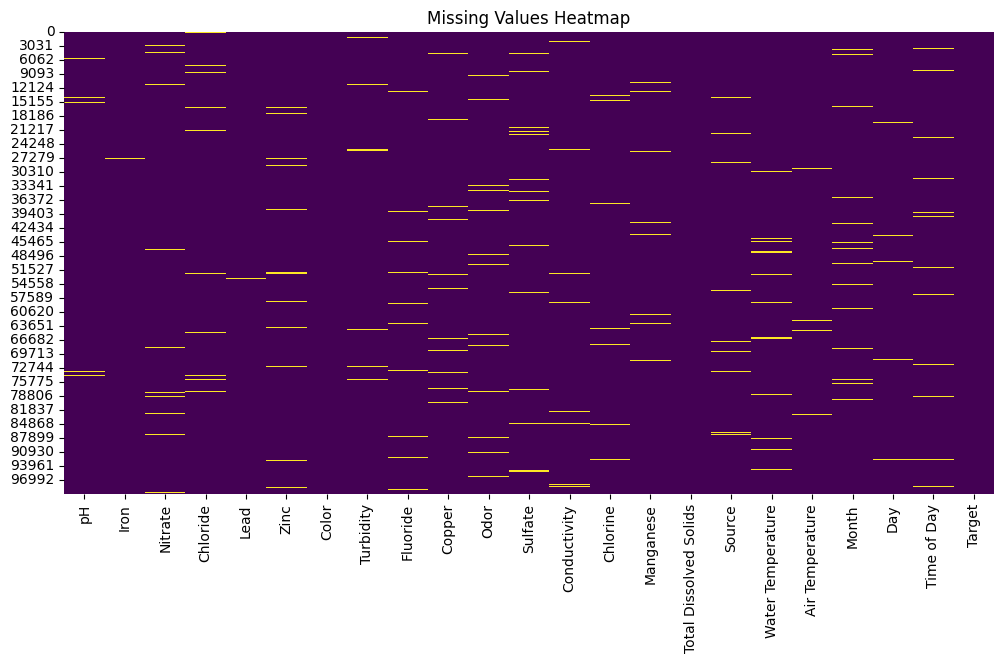

Missing Values Count:
 pH                        2021
Iron                       672
Nitrate                   1796
Chloride                  2955
Lead                       429
Zinc                      2561
Color                       99
Turbidity                  833
Fluoride                  3216
Copper                    3215
Odor                      2966
Sulfate                   3277
Conductivity              2785
Chlorine                  1008
Manganese                 1830
Total Dissolved Solids      39
Source                    1529
Water Temperature         2810
Air Temperature            479
Month                     1623
Day                       1691
Time of Day               1936
dtype: int64


In [15]:
# Detect missing values
missing_values = df.isnull().sum()

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Display missing values count
missing_values = missing_values[missing_values > 0]
print("Missing Values Count:\n", missing_values)


2. **Impute or Remove Missing Values:**
   - For numerical features, you can impute missing values using mean, median, or mode.
   - For categorical features, you can impute missing values using the most frequent category or a placeholder such as 'Unknown'.
   - Alternatively, remove rows with missing values if they are few and do not significantly impact the dataset.


Based on the percentage of missing values, we can decide on the following strategies:

- if a column has a very high percentage of missing values, it might be best to drop it.
- For numerical columns with moderate missing values, we can fill them with the mean or median.
- For categorical columns with missing values, we can fill them with the mode.

In [16]:
df.isna().sum().sort_values()

,0
Target,0
Total Dissolved Solids,39
Color,99
Lead,429
Air Temperature,479
Iron,672
Turbidity,833
Chlorine,1008
Source,1529
Month,1623


In [17]:
df.dropna()

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,7.262136,2.857248e-03,5.965704,245.101184,6.679537e-44,0.702867,Faint Yellow,0.014223,0.583591,0.039819,...,2.835370,8.067879e-03,153.126744,Spring,11.179752,55.340114,August,20.0,17.0,0
1,6.827967,3.555528e-04,8.650092,261.948686,2.751868e-159,0.205934,Colorless,0.339881,2.214786,0.224705,...,3.228036,4.245956e-05,260.391845,Ground,12.573723,80.335206,June,26.0,2.0,1
4,7.627800,1.721911e-04,7.988966,89.478315,3.450032e-76,0.402281,Colorless,0.520102,1.130603,0.211742,...,4.004640,9.799640e-03,395.187898,Ground,17.727374,36.844691,December,25.0,18.0,0
5,7.438374,1.023030e-01,6.891186,157.967041,1.198280e-42,0.185183,Yellow,0.000966,1.143355,1.195115,...,4.520820,2.810500e-02,217.500492,Well,6.706531,53.995611,August,20.0,10.0,1
6,7.945263,1.616232e-01,3.082807,191.561335,7.278161e-05,1.808817,Colorless,0.263444,1.765077,0.405573,...,3.615394,6.839616e-11,104.196529,Reservoir,9.201807,33.332203,October,22.0,23.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,6.463093,6.854987e-04,3.980943,301.672995,5.272680e-317,1.355574,Colorless,0.695195,2.287507,0.314559,...,4.140258,3.315744e-04,477.095920,Lake,15.928996,31.335848,August,22.0,3.0,1
99995,6.878051,4.117124e-07,5.322810,108.110638,8.696207e-159,3.182844,Colorless,0.278222,1.282346,0.759200,...,3.844900,3.612888e-03,490.345588,Lake,9.796617,38.218949,May,21.0,7.0,0
99996,6.234022,1.117469e-01,17.328060,419.511947,3.996521e-146,0.279021,Yellow,0.152766,1.119400,1.501363,...,2.896578,3.589283e-03,355.272379,Well,15.855275,63.903902,March,18.0,12.0,0
99997,7.861995,3.820164e-05,4.304552,215.233572,2.909526e-124,0.009500,Near Colorless,0.027866,0.093040,0.277302,...,2.131950,1.754100e-03,337.180755,River,37.648185,72.763230,May,15.0,12.0,0


In [18]:
# Impute missing values for numerical features with the mean
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].mean())

# Verify if missing values are imputed
print(df[numerical_features].isnull().sum())

pH                        0
Iron                      0
Nitrate                   0
Chloride                  0
Lead                      0
Zinc                      0
Turbidity                 0
Fluoride                  0
Copper                    0
Odor                      0
Sulfate                   0
Conductivity              0
Chlorine                  0
Manganese                 0
Total Dissolved Solids    0
Water Temperature         0
Air Temperature           0
Day                       0
Time of Day               0
Target                    0
dtype: int64


In [19]:
categorical_features

['Color', 'Source', 'Month']

In [20]:
df[categorical_features] = df[categorical_features].fillna('Unknown')

In [21]:
# Impute missing values for categorical features with the most frequent category
# categorical_features = df.select_dtypes(include=['object']).columns
# df[categorical_features] = df[categorical_features].apply(lambda x: x.fillna(x.mode()[0]))

# Verify if missing values are imputed
print(df[categorical_features].isnull().sum())

Color     0
Source    0
Month     0
dtype: int64


In [ ]:
df.isnull().sum()

,0
pH,0
Iron,0
Nitrate,0
Chloride,0
Lead,0
Zinc,0
Color,0
Turbidity,0
Fluoride,0
Copper,0


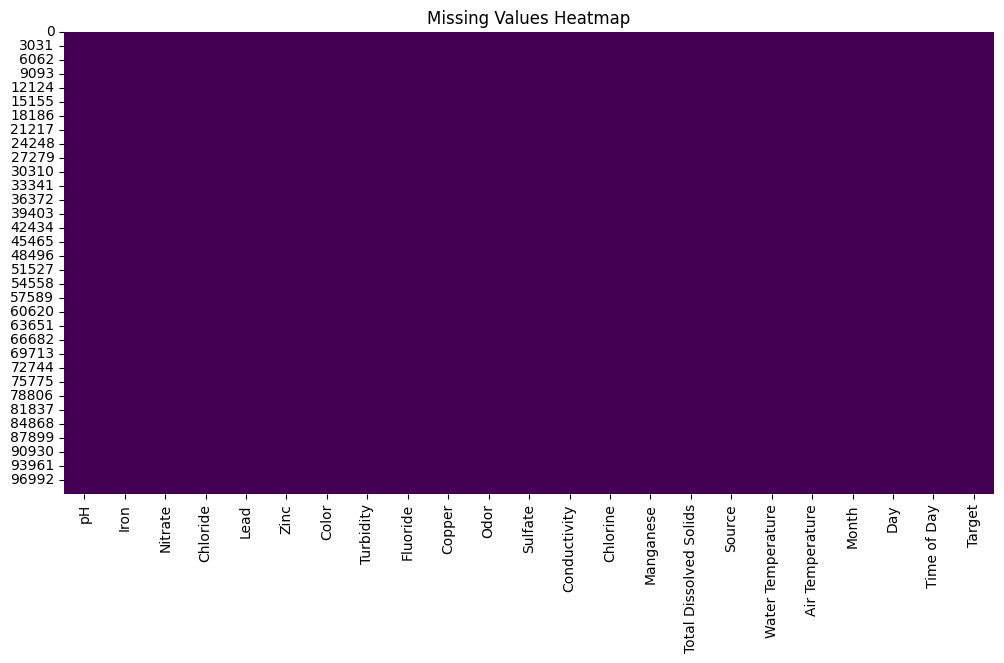

Missing Values Count:
 Series([], dtype: int64)


In [22]:
# Detect missing values
missing_values = df.isnull().sum()

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Display missing values count
missing_values = missing_values[missing_values > 0]
print("Missing Values Count:\n", missing_values)

## Step 2: Convert Categorical Data into Numerical Format

1. **Identify Categorical Features:**
   - Features like `Color`, `Odor`, and `Source` are categorical.



2. **Encode Categorical Features:**
   - Use one-hot encoding for nominal categorical features (e.g., `Color`, `Odor`, `Source`).
   - Use label encoding for ordinal categorical features, if any.

In [23]:
# Identify numerical and categorical features dynamically
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Exclude the target and non-feature columns if present
non_feature_cols = ['Target', 'Month', 'Day', 'Time of Day']
numerical_features = [col for col in numerical_features if col not in non_feature_cols]
categorical_features = [col for col in categorical_features if col not in non_feature_cols]

# Visualize initial dataframe
print("Initial DataFrame:")
df

Initial DataFrame:


,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,7.262136,2.857248e-03,5.965704,245.101184,6.679537e-44,0.702867,Faint Yellow,0.014223,0.583591,0.039819,...,2.835370,8.067879e-03,153.126744,Spring,11.179752,55.340114,August,20.0,17.0,0
1,6.827967,3.555528e-04,8.650092,261.948686,2.751868e-159,0.205934,Colorless,0.339881,2.214786,0.224705,...,3.228036,4.245956e-05,260.391845,Ground,12.573723,80.335206,June,26.0,2.0,1
2,7.450048,6.303493e-05,6.154743,176.192348,1.759505e-03,0.896104,Near Colorless,0.122076,1.566183,0.058934,...,2.863932,1.646600e-03,131.984171,Reservoir,12.702576,81.535521,January,4.0,16.0,0
3,7.782600,5.172140e-02,3.747001,224.053938,1.513023e-136,0.088500,Colorless,0.209460,0.693032,0.393710,...,4.195383,5.283502e-11,447.051626,Unknown,13.009862,72.845282,May,13.0,1.0,0
4,7.627800,1.721911e-04,7.988966,89.478315,3.450032e-76,0.402281,Colorless,0.520102,1.130603,0.211742,...,4.004640,9.799640e-03,395.187898,Ground,17.727374,36.844691,December,25.0,18.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,6.878051,4.117124e-07,5.322810,108.110638,8.696207e-159,3.182844,Colorless,0.278222,1.282346,0.759200,...,3.844900,3.612888e-03,490.345588,Lake,9.796617,38.218949,May,21.0,7.0,0
99996,6.234022,1.117469e-01,17.328060,419.511947,3.996521e-146,0.279021,Yellow,0.152766,1.119400,1.501363,...,2.896578,3.589283e-03,355.272379,Well,15.855275,63.903902,March,18.0,12.0,0
99997,7.861995,3.820164e-05,4.304552,215.233572,2.909526e-124,0.009500,Near Colorless,0.027866,0.093040,0.277302,...,2.131950,1.754100e-03,337.180755,River,37.648185,72.763230,May,15.0,12.0,0
99998,7.865141,4.720492e-02,1.782478,192.690548,8.000041e-221,0.303846,Colorless,0.004299,0.423846,0.538210,...,3.251744,1.972004e-02,307.239395,Stream,7.719304,46.404757,December,22.0,17.0,0


## Step 3: Normalize or Standardize Numerical Features

1. **Identify Numerical Features:**
   - Features like `pH`, `Iron`, `Nitrate`, `Chloride`, etc., are numerical.

2. **Normalize or Standardize:**
   - Normalize the features using Min-Max scaling or Standardize the features to have a mean of 0 and a standard deviation of 1.

In [24]:
# Normalize or Standardize Numerical Features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', MinMaxScaler())  # Normalize using Min-Max scaling
])

In [25]:
# Convert Categorical Data into Numerical Format
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encode categorical features
])


In [26]:

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [27]:
# Apply the transformations to the dataframe
df_preprocessed = preprocessor.fit_transform(df)

# Debug: Check the shape of the transformed data
print(f"Shape of transformed data: {df_preprocessed.shape}")


Shape of transformed data: (100000, 32)


In [28]:
type(df_preprocessed)

numpy.ndarray

In [29]:
print("Transformed data:")
print(df_preprocessed)

Transformed data:
[[4.88953494e-01 2.16005300e-04 1.05400640e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.45703997e-01 2.68794561e-05 1.58009074e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.07672262e-01 4.76538207e-06 1.09105410e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [5.48708137e-01 2.88800859e-06 7.28455008e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.49021548e-01 3.56864754e-03 2.34180927e-02 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.21231905e-01 2.39549056e-05 7.41982481e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [30]:
# Get feature names after preprocessing
num_features = numerical_features
cat_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_features = num_features + list(cat_features)

# Debug: Check the feature names
print(f"Number of feature names: {len(all_features)}")
print(f"Feature names: {all_features}")

Number of feature names: 32
Feature names: ['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity', 'Chlorine', 'Manganese', 'Total Dissolved Solids', 'Water Temperature', 'Air Temperature', 'Color_Colorless', 'Color_Faint Yellow', 'Color_Light Yellow', 'Color_Near Colorless', 'Color_Unknown', 'Color_Yellow', 'Source_Aquifer', 'Source_Ground', 'Source_Lake', 'Source_Reservoir', 'Source_River', 'Source_Spring', 'Source_Stream', 'Source_Unknown', 'Source_Well']


In [31]:
# Convert to DataFrame
df_preprocessed = pd.DataFrame(df_preprocessed, columns=all_features)

# Add back non-transformed columns (if any)
df_preprocessed[non_feature_cols] = df[non_feature_cols].reset_index(drop=True)

df_preprocessed

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,...,Source_Reservoir,Source_River,Source_Spring,Source_Stream,Source_Unknown,Source_Well,Target,Month,Day,Time of Day
0,0.488953,2.160053e-04,0.105401,0.223622,1.434368e-44,0.036896,0.000820,0.044927,0.004896,0.511224,...,0.0,0.0,1.0,0.0,0.0,0.0,0,August,20.0,17.0
1,0.445704,2.687946e-05,0.158009,0.241089,5.909379e-160,0.010810,0.019606,0.170519,0.027628,0.140528,...,0.0,0.0,0.0,0.0,0.0,0.0,1,June,26.0,2.0
2,0.507672,4.765382e-06,0.109105,0.152178,3.778372e-04,0.047040,0.007042,0.120580,0.007246,0.082469,...,1.0,0.0,0.0,0.0,0.0,0.0,0,January,4.0,16.0
3,0.540799,3.910089e-03,0.061919,0.201800,3.249075e-137,0.004646,0.012082,0.053353,0.048407,0.629020,...,0.0,0.0,0.0,0.0,1.0,0.0,0,May,13.0,1.0
4,0.525379,1.301748e-05,0.145052,0.062274,7.408619e-77,0.021117,0.030001,0.087044,0.026034,0.325154,...,0.0,0.0,0.0,0.0,0.0,0.0,0,December,25.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.450693,3.112507e-08,0.092801,0.081592,1.867429e-159,0.167080,0.016049,0.098727,0.093344,0.004723,...,0.0,0.0,0.0,0.0,0.0,0.0,0,May,21.0,7.0
99996,0.386538,8.447961e-03,0.328079,0.404448,8.582154e-147,0.014647,0.008812,0.086181,0.184594,0.601761,...,0.0,0.0,0.0,0.0,0.0,1.0,0,March,18.0,12.0
99997,0.548708,2.888009e-06,0.072846,0.192656,6.247933e-125,0.000499,0.001607,0.007158,0.034094,0.754377,...,0.0,1.0,0.0,0.0,0.0,0.0,0,May,15.0,12.0
99998,0.549022,3.568648e-03,0.023418,0.169283,1.717934e-221,0.015950,0.000248,0.032628,0.066173,0.558425,...,0.0,0.0,0.0,1.0,0.0,0.0,0,December,22.0,17.0


In [32]:
# Show the preprocessed dataframe
print("\nPreprocessed DataFrame:")
df_preprocessed.head()


Preprocessed DataFrame:


,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,...,Source_Reservoir,Source_River,Source_Spring,Source_Stream,Source_Unknown,Source_Well,Target,Month,Day,Time of Day
0,0.488953,0.000216,0.105401,0.223622,1.434368e-44,0.036896,0.000820,0.044927,0.004896,0.511224,...,0.0,0.0,1.0,0.0,0.0,0.0,0,August,20.0,17.0
1,0.445704,0.000027,0.158009,0.241089,5.909379e-160,0.010810,0.019606,0.170519,0.027628,0.140528,...,0.0,0.0,0.0,0.0,0.0,0.0,1,June,26.0,2.0
2,0.507672,0.000005,0.109105,0.152178,3.778372e-04,0.047040,0.007042,0.120580,0.007246,0.082469,...,1.0,0.0,0.0,0.0,0.0,0.0,0,January,4.0,16.0
3,0.540799,0.003910,0.061919,0.201800,3.249075e-137,0.004646,0.012082,0.053353,0.048407,0.629020,...,0.0,0.0,0.0,0.0,1.0,0.0,0,May,13.0,1.0
4,0.525379,0.000013,0.145052,0.062274,7.408619e-77,0.021117,0.030001,0.087044,0.026034,0.325154,...,0.0,0.0,0.0,0.0,0.0,0.0,0,December,25.0,18.0


## Explanation:
1. SimpleImputer is used to handle missing values.
2. OneHotEncoder is used for encoding categorical variables.
3. MinMaxScaler is used to normalize numerical features.
4. ColumnTransformer is used to apply different preprocessing steps to different columns.

Ensure to replace 'your_data.csv' with the actual file path of your dataset. The preprocessed data will be saved in a new file called cleaned_data.csv. This cleaned and preprocessed data is now ready for further analysis or modeling.

In [33]:
df_preprocessed.to_csv("sample_data/preprocessed.csv", index = False)


# **Task 2. Feature Engineering**
    


## Step 1: Create New Features

1. **Interaction Terms:**
   - Create new features by multiplying or combining existing features to capture interactions between them.

2. **Aggregate Features:**
   - Create aggregate features such as mean, median, sum, or count of other features.


In [34]:
df = pd.read_csv("sample_data/preprocessed.csv")

In [35]:
df

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,...,Source_Reservoir,Source_River,Source_Spring,Source_Stream,Source_Unknown,Source_Well,Target,Month,Day,Time of Day
0,0.488953,2.160053e-04,0.105401,0.223622,1.434368e-44,0.036896,0.000820,0.044927,0.004896,0.511224,...,0.0,0.0,1.0,0.0,0.0,0.0,0,August,20.0,17.0
1,0.445704,2.687946e-05,0.158009,0.241089,5.909379e-160,0.010810,0.019606,0.170519,0.027628,0.140528,...,0.0,0.0,0.0,0.0,0.0,0.0,1,June,26.0,2.0
2,0.507672,4.765382e-06,0.109105,0.152178,3.778372e-04,0.047040,0.007042,0.120580,0.007246,0.082469,...,1.0,0.0,0.0,0.0,0.0,0.0,0,January,4.0,16.0
3,0.540799,3.910089e-03,0.061919,0.201800,3.249075e-137,0.004646,0.012082,0.053353,0.048407,0.629020,...,0.0,0.0,0.0,0.0,1.0,0.0,0,May,13.0,1.0
4,0.525379,1.301748e-05,0.145052,0.062274,7.408619e-77,0.021117,0.030001,0.087044,0.026034,0.325154,...,0.0,0.0,0.0,0.0,0.0,0.0,0,December,25.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.450693,3.112507e-08,0.092801,0.081592,1.867429e-159,0.167080,0.016049,0.098727,0.093344,0.004723,...,0.0,0.0,0.0,0.0,0.0,0.0,0,May,21.0,7.0
99996,0.386538,8.447961e-03,0.328079,0.404448,8.582154e-147,0.014647,0.008812,0.086181,0.184594,0.601761,...,0.0,0.0,0.0,0.0,0.0,1.0,0,March,18.0,12.0
99997,0.548708,2.888009e-06,0.072846,0.192656,6.247933e-125,0.000499,0.001607,0.007158,0.034094,0.754377,...,0.0,1.0,0.0,0.0,0.0,0.0,0,May,15.0,12.0
99998,0.549022,3.568648e-03,0.023418,0.169283,1.717934e-221,0.015950,0.000248,0.032628,0.066173,0.558425,...,0.0,0.0,0.0,1.0,0.0,0.0,0,December,22.0,17.0


In [36]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove("Target")
numerical_features

['pH',
 'Iron',
 'Nitrate',
 'Chloride',
 'Lead',
 'Zinc',
 'Turbidity',
 'Fluoride',
 'Copper',
 'Odor',
 'Sulfate',
 'Conductivity',
 'Chlorine',
 'Manganese',
 'Total Dissolved Solids',
 'Water Temperature',
 'Air Temperature',
 'Color_Colorless',
 'Color_Faint Yellow',
 'Color_Light Yellow',
 'Color_Near Colorless',
 'Color_Unknown',
 'Color_Yellow',
 'Source_Aquifer',
 'Source_Ground',
 'Source_Lake',
 'Source_Reservoir',
 'Source_River',
 'Source_Spring',
 'Source_Stream',
 'Source_Unknown',
 'Source_Well',
 'Day',
 'Time of Day']

In [37]:

# Create new features
df['Water_Temp_to_Air_Temp_Ratio'] = df['Water Temperature'] / (df['Air Temperature'] + 1)
df['Total_Metals'] = df[['Iron', 'Lead', 'Zinc', 'Copper', 'Manganese']].sum(axis=1)

numerical_features.extend(['Water_Temp_to_Air_Temp_Ratio', 'Total_Metals'])


In [38]:
numerical_features

['pH',
 'Iron',
 'Nitrate',
 'Chloride',
 'Lead',
 'Zinc',
 'Turbidity',
 'Fluoride',
 'Copper',
 'Odor',
 'Sulfate',
 'Conductivity',
 'Chlorine',
 'Manganese',
 'Total Dissolved Solids',
 'Water Temperature',
 'Air Temperature',
 'Color_Colorless',
 'Color_Faint Yellow',
 'Color_Light Yellow',
 'Color_Near Colorless',
 'Color_Unknown',
 'Color_Yellow',
 'Source_Aquifer',
 'Source_Ground',
 'Source_Lake',
 'Source_Reservoir',
 'Source_River',
 'Source_Spring',
 'Source_Stream',
 'Source_Unknown',
 'Source_Well',
 'Day',
 'Time of Day',
 'Water_Temp_to_Air_Temp_Ratio',
 'Total_Metals']

In [39]:
categorical_features

['Color', 'Source']

In [40]:
# numerical_features.remove('Day')
# numerical_features.remove('Time of Day')
# print(numerical_features)
# categorical_features.remove('Month')
# categorical_features

In [41]:

# Apply transformations
X = df.drop('Target', axis=1)
y = df['Target']

# X_transformed = preprocessor.fit_transform(X)

# Create a DataFrame from the transformed data
# X_transformed_df = pd.DataFrame(X, columns=numerical_features + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)))


X_transformed_df=X[numerical_features].copy()
print("\nTransformed Features Head:")
X_transformed_df.head()


Transformed Features Head:


,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,...,Source_Reservoir,Source_River,Source_Spring,Source_Stream,Source_Unknown,Source_Well,Day,Time of Day,Water_Temp_to_Air_Temp_Ratio,Total_Metals
0,0.488953,0.000216,0.105401,0.223622,1.434368e-44,0.036896,0.000820,0.044927,0.004896,0.511224,...,0.0,0.0,1.0,0.0,0.0,0.0,20.0,17.0,0.039084,0.042576
1,0.445704,0.000027,0.158009,0.241089,5.909379e-160,0.010810,0.019606,0.170519,0.027628,0.140528,...,0.0,0.0,0.0,0.0,0.0,0.0,26.0,2.0,0.040480,0.038468
2,0.507672,0.000005,0.109105,0.152178,3.778372e-04,0.047040,0.007042,0.120580,0.007246,0.082469,...,1.0,0.0,0.0,0.0,0.0,0.0,4.0,16.0,0.040769,0.054784
3,0.540799,0.003910,0.061919,0.201800,3.249075e-137,0.004646,0.012082,0.053353,0.048407,0.629020,...,0.0,0.0,0.0,0.0,1.0,0.0,13.0,1.0,0.043362,0.056963
4,0.525379,0.000013,0.145052,0.062274,7.408619e-77,0.021117,0.030001,0.087044,0.026034,0.325154,...,0.0,0.0,0.0,0.0,0.0,0.0,25.0,18.0,0.071760,0.047854


In [ ]:
X_transformed_df.columns

Index(['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Turbidity',
       'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity', 'Chlorine',
       'Manganese', 'Total Dissolved Solids', 'Water Temperature',
       'Air Temperature', 'Color_Colorless', 'Color_Faint Yellow',
       'Color_Light Yellow', 'Color_Near Colorless', 'Color_Unknown',
       'Color_Yellow', 'Source_Aquifer', 'Source_Ground', 'Source_Lake',
       'Source_Reservoir', 'Source_River', 'Source_Spring', 'Source_Stream',
       'Source_Unknown', 'Source_Well', 'Day', 'Time of Day',
       'Water_Temp_to_Air_Temp_Ratio', 'Total_Metals'],
      dtype='object')

In [ ]:
X_transformed_df.shape

(100000, 36)


# **Task 3. Model Building**
## Step 1: Split the Data into Training and Testing Sets
   - Use a function to split the dataset into training and testing sets.


In [42]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, y, test_size=0.2, random_state=42)


## Step 2: Train Machine Learning Models to Predict the Target Variable

1. **Train Models:**
   - Train different machine learning models such as Logistic Regression, Random Forest, and Support Vector Machine.

In [43]:

model_rf=RandomForestClassifier(n_estimators=10, random_state=42)
model_rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10, random_state=42)

## Step 2: Evaluate Model Performance Using Appropriate Metrics

1. **Evaluate Models:**
   - Evaluate the performance of the models using metrics like accuracy, precision, recall, and F1-score.

In [44]:


y_pred = model_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results= {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1}

results

{'accuracy': 0.85365,
 'precision': 0.7286261165461506,
 'recall': 0.8353381014304291,
 'f1': 0.7783415372964786}

In [45]:
# create function to get results to avoid repetition
def get_results(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results= {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1}
    return results

In [46]:
get_results(y_test, y_pred)

{'accuracy': 0.85365,
 'precision': 0.7286261165461506,
 'recall': 0.8353381014304291,
 'f1': 0.7783415372964786}

### Compare different models

In [47]:
# Define models to compare
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=10, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Train and evaluate each model with progress tracking using tqdm
results = {}
for name, model in tqdm(models.items(), desc="Training and Evaluating Models"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = get_results(y_test, y_pred)

Training and Evaluating Models: 100%|██████████| 4/4 [00:52<00:00, 13.06s/it]


In [48]:
# Display results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
results_df



Model Performance Comparison:


,accuracy,precision,recall,f1
Logistic Regression,0.79185,0.730582,0.512191,0.602198
Random Forest,0.85365,0.728626,0.835338,0.778342
K-Nearest Neighbors,0.70955,0.551828,0.296814,0.386006
Decision Tree,0.82440,0.716820,0.709363,0.713072


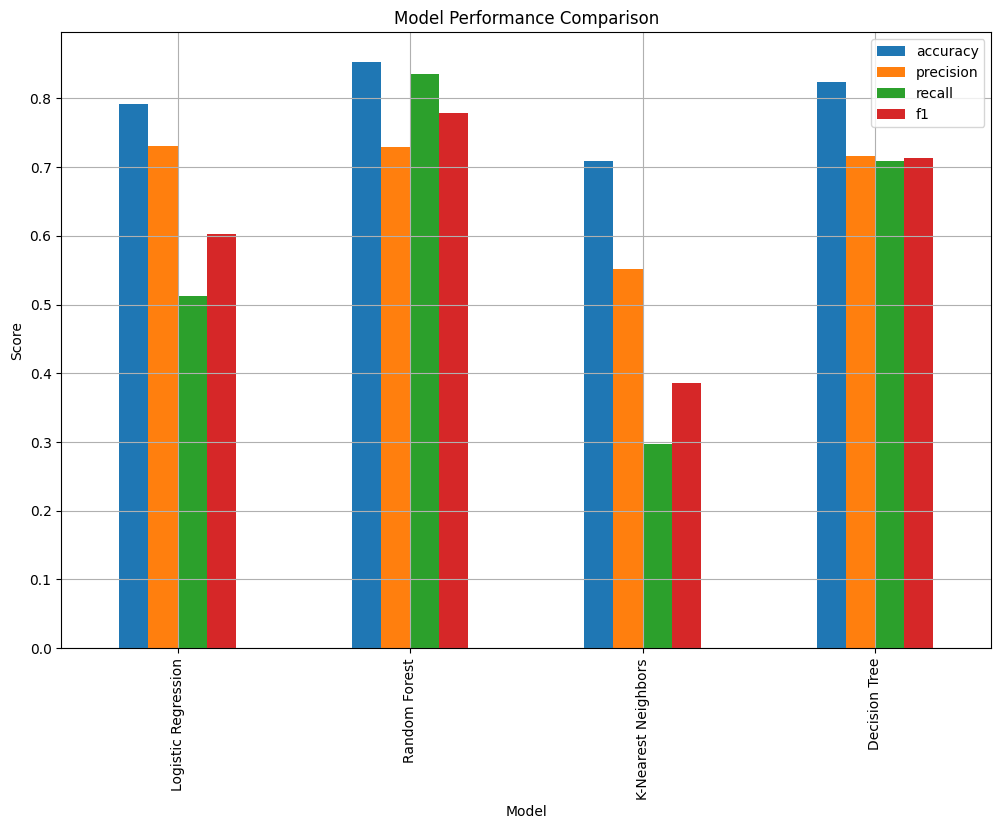

In [49]:

# Plot results for visual comparison
results_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.grid()
plt.show()


In [50]:

# Choose the best model based on F1-score
best_model_name = results_df['f1'].idxmax()
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")


Best Model: Random Forest


# **Task 4. Model Interpretation and Insights**


## Step 1: Interpret the Model to Understand Which Factors Most Influence Water Quality
1. **Feature Importance:**
   - Use the feature importance scores from tree-based models like Random Forest to identify which factors most influence water quality.
   - Use coefficients from Logistic Regression to understand the direction and magnitude of influence.


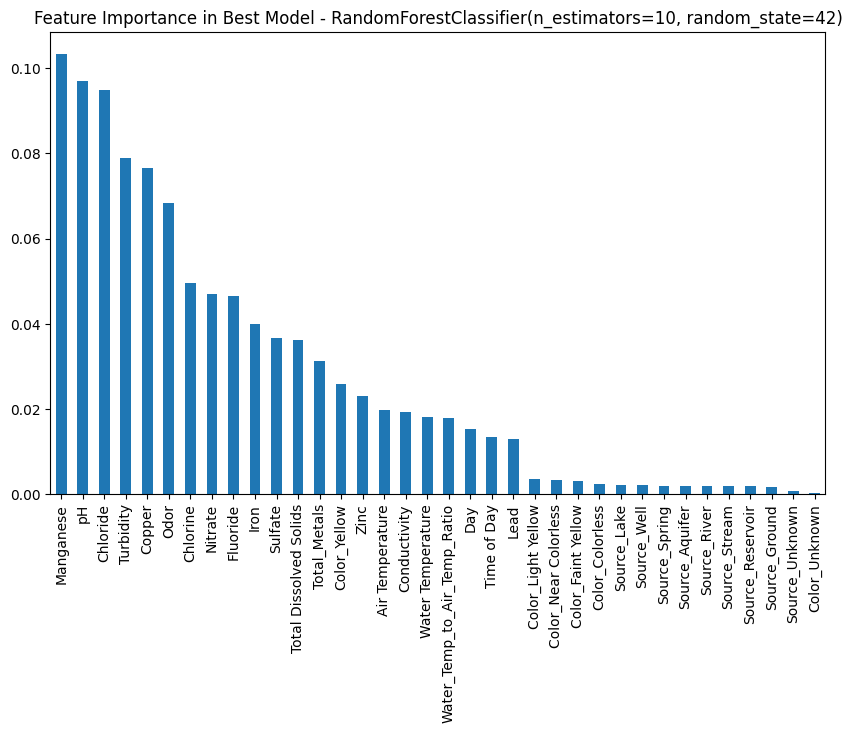


Top 5 important features: Index(['Manganese', 'pH', 'Chloride', 'Turbidity', 'Copper', 'Odor',
       'Chlorine', 'Nitrate', 'Fluoride', 'Iron'],
      dtype='object')


In [51]:


# Interpret the best model to understand which factors most influence water quality
if hasattr(best_model, 'feature_importances_'):
    # feature_importance = pd.Series(best_model.feature_importances_, index=numerical_features + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)))
    feature_importance = pd.Series(best_model.feature_importances_, index=numerical_features )
    feature_importance.sort_values(ascending=False, inplace=True)

    plt.figure(figsize=(10, 6))
    feature_importance.plot(kind='bar')
    plt.title(f'Feature Importance in Best Model - {best_model}')
    plt.show()

important_features = feature_importance.head(10).index if 'feature_importances_' in dir(best_model) else numerical_features + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))
print(f'\nTop 5 important features: {important_features}')

In [56]:

# === Unified Optimized RF Model with MSF + Adaptive Feature Selection ===

# 1. Multi-Source Fusion (MSF)
df['historical_ph'] = df['pH'].rolling(window=3, min_periods=1).mean()
df['historical_Temperature'] = df['Water Temperature'].rolling(window=3, min_periods=1).mean()

# 2. Encode Categorical and Fill Missing
df = pd.get_dummies(df)
df.fillna(df.mean(numeric_only=True), inplace=True)

# 3. Train-Test Split
train, temp = train_test_split(df, test_size=0.30, random_state=42)
test, val = train_test_split(temp, test_size=1/3, random_state=42)
X_train = train.drop(columns=["Target"])
y_train = train["Target"]
X_test = test.drop(columns=["Target"])
y_test = test["Target"]
X_val = val.drop(columns=["Target"])
y_val = val["Target"]

# 4. Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# 5. Feature Importance using Random Forest
rf_base = RandomForestClassifier(n_estimators=100, random_state=42)
rf_base.fit(X_train_scaled, y_train)
importances = rf_base.feature_importances_

# 6. Adaptive RFE with L1 Regularization
X_train_weighted = X_train_scaled * importances
rfe = RFE(estimator=LogisticRegression(penalty='l1', solver='liblinear'), n_features_to_select=20)
rfe.fit(X_train_weighted, y_train)

# 7. Reduce Feature Set
X_train_opt = rfe.transform(X_train_scaled)
X_test_opt = rfe.transform(X_test_scaled)
X_val_opt = rfe.transform(X_val_scaled)

# 8. Optimized RF Model (Final)
optimized_rf = RandomForestClassifier(n_estimators=200, random_state=42)
optimized_rf.fit(X_train_opt, y_train)
y_pred_final = optimized_rf.predict(X_test_opt)

# 9. Evaluation
acc_final = accuracy_score(y_test, y_pred_final)
print("\n=== Optimized RF Model (MSF + RFE + L1) ===")
print(f"Accuracy: {acc_final*100:.2f}%")
print(classification_report(y_test, y_pred_final))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_final))



=== Optimized RF Model (MSF + RFE + L1) ===
Accuracy: 88.28%
              precision    recall  f1-score   support

           0       0.99      0.84      0.91     13875
           1       0.73      0.97      0.84      6125

    accuracy                           0.88     20000
   macro avg       0.86      0.91      0.87     20000
weighted avg       0.91      0.88      0.89     20000

Confusion Matrix:
 [[11702  2173]
 [  172  5953]]
